<a href="https://colab.research.google.com/github/jeev64/myDB/blob/master/EmpTurnOverPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas as tm
import seaborn as sns


In [5]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (3).csv


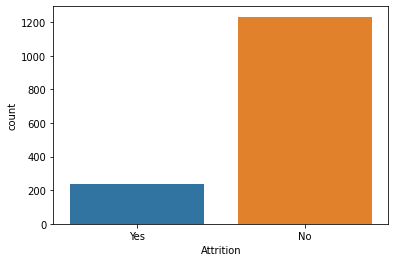

In [ ]:
sns.countplot(df['Attrition'])

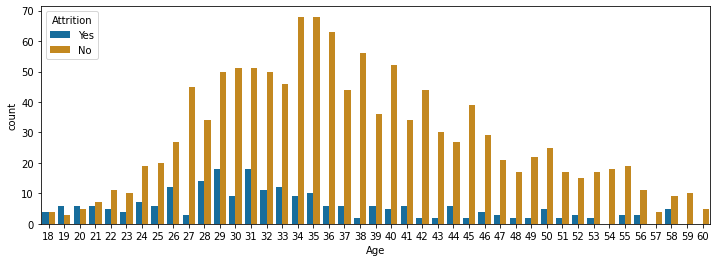

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))

sns.countplot(x = 'Age', hue = 'Attrition', data = df, palette = 'colorblind')

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
      print(str(column) + ':' + str(df[column].unique()))
      print(df[column].value_counts())
      print('_____________________________________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_____________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_____________________________________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gend

In [ ]:
df = df.drop('Over18', axis= 1)
df = df.drop('EmployeeNumber', axis= 1)
df = df.drop('StandardHours', axis= 1)
df = df.drop('EmployeeCount', axis= 1)


NameError: ignored

In [ ]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [7]:
import pandas as pd

# Load the dataset
data_path = 'WA_Fn-UseC_-HR-Employee-Attrition (3).csv'  # Adjust the path to where your file is stored
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Preview of the dataset:")
print(df.head())

# Display the headers (column names)
print("\nHeaders in the dataset:")
print(df.columns)

# Iterate through each header
for header in df.columns:
    print(f"Processing header: {header}")


Preview of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  St

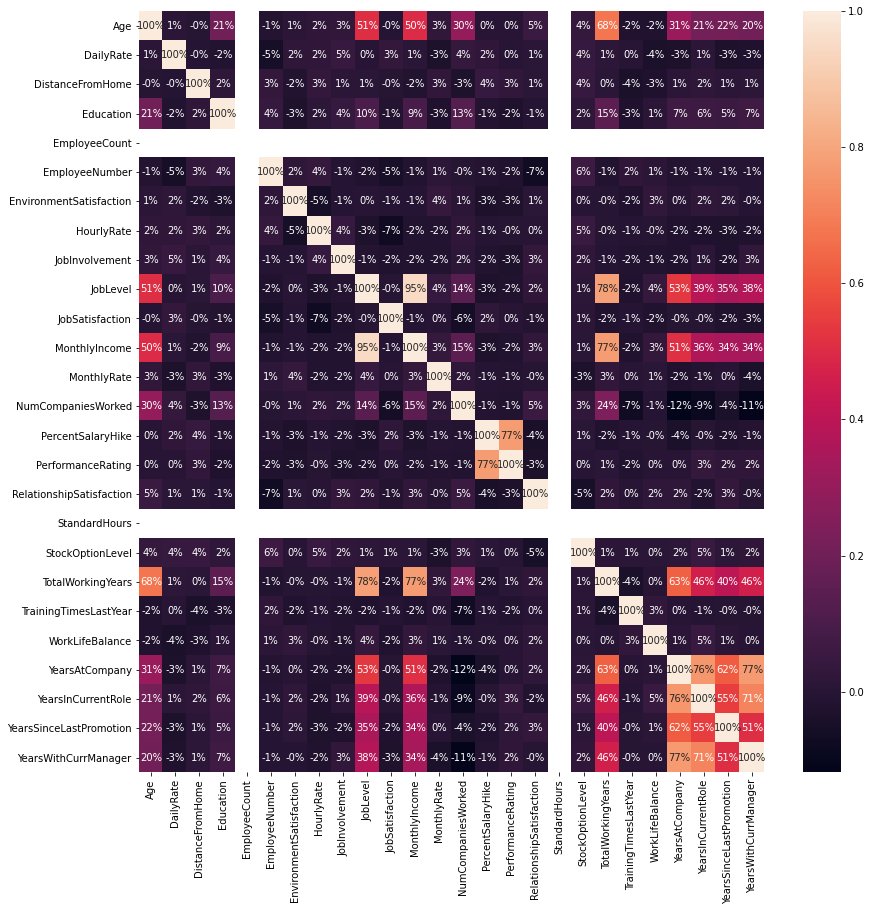

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='0.0%')

In [ ]:
#transform the none numerical data to numeric
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
      if df[column].dtype == np.number:
       continue
      df[column] = LabelEncoder().fit_transform(df[column])

In [8]:

df['Age_Year'] = df['Age']

In [14]:
if 'Age' in df.columns:  # Check for exact match
    df = df.drop('Age', axis=1)
else:
    print("No exact match found for 'Age'.")

No exact match found for 'Age'.


# New Section

# New Section

In [ ]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Year
0,1,2,624,2,0,1,1,0,0,1,0,64,2,1,7,3,2,809,999,8,0,1,0,0,0,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,0,12,1,3,0,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,0,2,3,1,62,1,0,2,2,2,62,18,6,0,1,4,0,1,0,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,0,3,3,0,26,2,0,6,2,1,313,1228,1,0,1,0,0,2,0,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,4,0,1,10,2,0,2,1,1,399,846,9,0,0,1,0,3,0,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,0,1465,2,1,11,3,1,2,3,1,210,599,4,0,0,6,0,2,0,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,0,1466,3,1,12,1,2,0,0,1,1070,1123,4,0,0,4,0,0,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,0,1467,1,1,57,3,1,4,1,1,821,175,1,0,1,9,1,1,0,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,0,1468,3,1,33,1,1,7,1,1,730,641,2,0,0,3,0,3,0,0,17,3,1,9,6,0,8,31


In [ ]:
x = df.iloc[:, 1:df.shape[1]].values
y = df.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = Ra_train,ndomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state= 0 )
forest.fit(x y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
forest.score(x_train, y_train)

0.9782214156079855

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('model testing accuracy:{}'.format((TN+TP)/(TN+TP+FN+FP)))

[[306   4]
 [ 52   6]]
model testing accuracy:0.8478260869565217
